# Øving 6 - TMA4320

* **Veiledning:** Torsdag 12. mars og torsdag 19. mars, 2020, kl 0815-1000 i H3.
* **Innleveringsfrist:** Fredag 20. mars, 2020, kl 08:00.* 
* **Innleveringsmetode** Følgende to krav er nødvendig for godkjenning
    1. Opplasting av Jupyter Notebook (individuelt) i Blackboard
    2. Svare på Blackboardskjema for de tre kontrollspørsmålene i øvingen

**Innledning.** I 1989 publiserte Lawrence Shampine sammen med sin PhD-student Przemyslaw Bogacki en artikkel om et innbygd Runge-Kutta par av orden 3(2) med gode egenskaper. I denne oppgaven skal du implementere denne metoden og teste den ut på et interessant problem. Dette kan være en god forberedelse til Prosjekt 3.
Et skritt av metoden kan for problemet $\dot{y}=f(t,y)$ formuleres som

\begin{align*}
k_1 &= f(t_n,y_n) \\
k_2 &= f(t_n+\tfrac12 h_n, y_n+\tfrac12 h_nk_1) \\
k_3 &= f(t_n+\tfrac34 h_n, y_n + \tfrac34 h_nk_2) \\[1mm]
y_{n+1} &= y_n + \tfrac19 h_n (2 k_1 + 3k_2 + 4k_3)\\[1mm]
k_4 &= f(t_n + h_n,y_{n+1}) \\[1mm]
z_{n+1} &= y_n + \tfrac{1}{24} h_n (7k_1 + 6k_2 + 8 k_3 + 3 k_4)
\end{align*}

**Implementasjon.** Man kan implementere denne metoden ved å kode opp en funksjon som tar følgende input
* t0: Startpunktet (venstre endepunkt)
* tend: Sluttpunktet (høyre endepunkt)
* y0: Den gitte initialverdien i t0
* f: En funksjon som beskrevet nedenfor
* h0: En omtrentlig første tidsskrittlengde
* tol: En brukerspesifisert toleranse for lokalfeil

Funksjonen returnerer
* T: et numpy array med alle [t0,t1,...,tend], disse velges av funksjonen
* Y: En 2d numpy-matrise der rad n angir løsning ved tid $t=t_n$
* stats: en dictionary over interessant statistikk. For eksempel kan man ha nøklene 'steps' for antall skritt, 'fevals' for antall kall til funksjonen f, og 'rejects' for antall ganger skritt ble forkastet. Man kan selv velge hva slags informasjon man ellers vil legge inn i stats.

Inputfunksjonen f tar to inputargumenter, $t$ og $y$ der $t$ er et reelt tall og $y$ er et numpy-array med
lengde lik problemets dimensjon. Den returnerer et numpy-array av samme dimensjon som y som inneholder $f(t,y)$.

Når man forsøker å ta ett skritt med metoden, så beregner man først $y_{n+1}$ og $z_{n+1}$ fra formlene gitt ovenfor, og danner så et skalart feilestimat

$$
\mathrm{est}_{n+1} = \| y_{n+1} - z_{n+1} \|
$$

I tillegg fins en justeringsformel for skrittlengden fra ett skritt til et annet. Vi setter

$$
    h_{ny} = \alpha\cdot h_n \cdot \left(\frac{tol}{est}\right)^{1/3},\quad \alpha\approx 0.8-0.9
$$

$\alpha$ er en såkalt pessimistfaktor. Hvis den velges for liten så blir man veldig forsiktig, tar kortere skritt enn nødvendig og bruker dermed uforholdsmessig mange skritt. Hvis den velges for stor så kan det bli mange forkastede skritt. Man tar færre skritt, men bruker regnetid på å gjøre om igjen mange skritt.

Algoritmen kan beskrives som følger (tar ikke med statistikkinnsamling)

* Gitt $t_0, t_{end}, y_0, h_0, tol, f$ som input
* $h=h_0$, $n=0$
* $k_1=f(t_0,y_0)$
* **while** $t_{end}-t_n>0$
    * $h=\min(h,t_{end}-t_n)$
    * Beregn $k_2, k_3$ og deretter $y_{n+1}$ fra oppgitt formel
    * $t_{n+1} = t_n+h$
    * Beregn $k_4$ og deretter $z_{n+1}$ fra oppgitt formel
    * $est=\| y_{n+1} - z_{n+1} \|$
    * **if** $est < tol$ (aksepter skritt)
        * $n=n+1$
        * $k_1=k_4$
    * $h_{ny}$ beregnes fra oppgitt formel og sett $h=h_{ny}$.

Merk at enten skrittet forkastes eller aksepteres så brukes samme formel for å oppdatere skrittlengden $h$.

<!---

*Dynamisk allokering.* Et programteknisk problem som må løses er det faktum at du ikke vet størrelsen på arrayene $T$ og $Y$ apriori. Én måte å løse dette på er å bruke dictionaries som mellomlagring. En kan for eksempel starte
med å sette
* Tdict={0 : t0}
* Ydict={0 : y0}
og deretter lagre i Tdict[k] og Ydict[k] når k økes. Til slutt kan man overføre Tdict og Ydict i numpy arrays T og Y.

En annen måte som kanskje er mer effektiv og minne-økonomisk er å bruke numpy-funksjonen append. I denne oppgaven er vi ikke så opptatt av kodens effektivitet og det blir litt opp til hver og en hvordan man vil løse problemet.

-->




**Oppgave 1** Skriv koden og test den ut på det enkle problemet

$$
u'=v,\ v'=-4u,\quad u(0)=1,\ v(0)=0,\ [t_0,t_{end}]=[0,2\pi]
$$

som har eksakt løsning $u(t)=\cos 2t$ og $v(t)=-2\sin 2t$. Merk at her er $y(t)=[u(t),v(t)]^T$.

Lag 3 plott
* Et som viser de to komponentene $u$ og $v$ beregnet av metoden som funksjon av $t$ i samme plott
* Et som viser den virkelige feilen som funksjon av $t$ (bruk kjent eksakt løsning)
* Et som viser hvordan skrittlengden varierer med som funksjon av $t$

Skriv ut statistikk også, dvs antall skritt, funksjonsevalueringer og forkastede skritt.


**Oppgave 2** Anvend funksjonen på Brusselator-problemet nedenfor. Sett pessimistfaktor $\alpha=0.9$,
$t_0=0$, $t_{end}=20$, og $tol=10^{-5}$. La $h0=0.1$.

\begin{align*}
u' &= 1 + u^2 v - 4 u, & u(0)&=1 \\
v' &= 3u - u^2 v,  & v(0)&=2.9
\end{align*}

Lag 3 plott
* Et som plotter $v$ mot $u$ (faseplott) dvs $u$ langs $x$-aksen og $v$ langs $y$-aksen.
* Et som viser de to komponentene $u$ og $v$  som funksjon av $t$ is samme plott
* Et som viser hvordan skrittlengden varierer med som funksjon av $t$


**Kontrollspørsmål:** Du blir her bedt om å rapportere statistikk fra eksperimentet i Oppgave 2.
Antall skritt koden din bruker, antall funksjonsevalueringer (feval) og antall forkastede skritt.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

def BogackiShampine(t0,tend,y0,f,h0,tol):
    alpha=0.9 #Pessimistfaktor
    h=h0; n=0; fval=1;l=0; #Initsialiserer h, n, fval og l
    k1=f(t0,y0) #Regner ut første k-verdi (1x2). Allerede lagt til i fval
    Ya=[np.array(y0)]
    Ta=[t0]
    H=[h0]
    stats={"iterations" : n,"fval": fval,"skrittlengde" : H,"dump" : l}
    while tend-Ta[-1]>0:
        h=min(h,tend-Ta[-1])
        #Regner ut k2, k3, tn og Y(n+1)
        k2=f(Ta[n]+0.5*h,Ya[n]+0.5*h*k1)
        k3=f(Ta[n]+(3/4)*h,Ya[n]+(3/4)*h*k2)
        tn =Ta[-1]+h
        Yny=Ya[n]+(1/9)*h*(2*k1+3*k2+4*k3)#Dette er Y(n+1)
        k4=f(Ta[n]+h,Yny)
        z=Ya[n]+(1/24)*h*(7*k1+6*k2+8*k3+3*k4)
        est=LA.norm(Yny-z)
        if est<tol:
            n+=1
            k1=k4
            Ya.append(Yny)
            Ta.append(tn)
            H.append(h)
        else:
            l+=1
        stats["fval"]+=3
        h=alpha*h*((tol/est)**(1/3))
    stats["dump"]=l    
    stats["iterations"]=n
    stats["skrittlengde"]=H
    return Ta,Ya,stats



**Kode for Oppgave 1** skrives under her

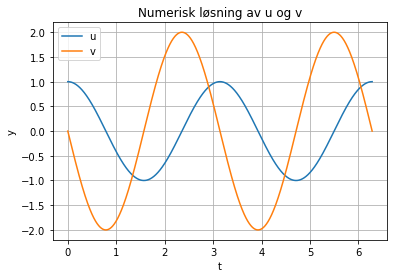

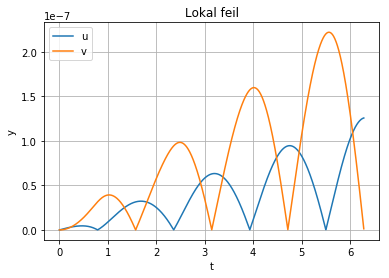

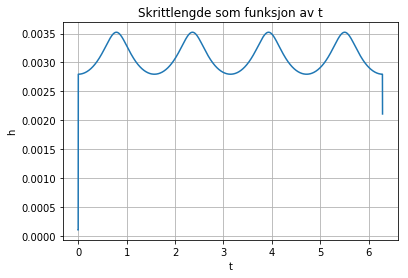

Antall iterasjoner: 2049
Antall funksjonsevalueringer: 6148
Forkastede skritt: 0


In [25]:
import numpy as np

#t reelt tall og y er en array med lengde lik antall delfunksjoner
def LinearTestProblem(t,y):
    return np.array([y[1],-4*y[0]])

# Fyll inn koden som løser diffligningen, plotter, og skriver ut statistikk
T,Y,stats=BogackiShampine(0,2*np.pi,np.array([1,0]),LinearTestProblem,0.0001,10**(-8))
T=np.array(T)

Y=np.array(Y).transpose()
plt.plot(T,Y[0],label="u")
plt.plot(T,Y[1],label="v")
plt.title("Numerisk løsning av u og v")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

plt.plot(T,abs(np.cos(2*T)-Y[0]),label="u") #Bruker at feil= abs(Est-faktisk)
plt.plot(T,abs(-2*np.sin(2*T)-Y[1]),label="v")
plt.title("Lokal feil")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

plt.plot(T,stats["skrittlengde"])
plt.title("Skrittlengde som funksjon av t")
plt.xlabel("t")
plt.ylabel("h")
plt.grid()
plt.show()

print("Antall iterasjoner:",stats["iterations"])
print("Antall funksjonsevalueringer:",stats["fval"])
print("Forkastede skritt:",stats["dump"])

**Kode for Oppgave 2** skrives under her

In [26]:
def Brusselator(t,y):
    return np.array([1+y[0]**2*y[1]-4*y[0],3*y[0]-y[0]**2*y[1]])

T,Y,stats=BogackiShampine(0,20,np.array([1,2.9]),Brusselator,0.1,10**(-5))

print(stats)


{'iterations': 424, 'fval': 1336, 'skrittlengde': [0.1, 0.1, 0.17467044387725028, 0.1607178911481025, 0.1491421397131632, 0.1413177394355584, 0.13603044531780573, 0.1324217067671969, 0.1299777224629675, 0.1283764161426563, 0.12739801963397543, 0.12687547618411588, 0.12666504210248344, 0.12662765024861936, 0.12661727335759687, 0.1264755905215495, 0.12603380439626866, 0.12512266617459628, 0.12359058422090756, 0.12132729331370452, 0.11828741689070368, 0.11450542349056828, 0.11009352458373732, 0.10521989483811918, 0.10007446396165137, 0.09483572272285876, 0.08964919384800844, 0.08462005690725795, 0.07981605624682876, 0.07527519027004786, 0.0710141317158535, 0.0670353901276229, 0.06333267414574806, 0.059894612241783766, 0.05670721006613101, 0.05375541751561622, 0.05102410033147293, 0.04849862680308824, 0.046165212337031886, 0.04401111621394814, 0.042024752456277056, 0.04019575620480503, 0.038515034716023, 0.03697482587030802, 0.035568785565662064, 0.03429212859875711, 0.033141856776339816, 